In [6]:
"""Running basic code:
Importing packages, setting working directory, 
printing out date"""

import os as os
os.chdir('C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/')
import datetime as dt
str(dt.datetime.now())
from sklearn.metrics import confusion_matrix
import seaborn as sns
#from pandas_ml import ConfusionMatrix
data_path = 'C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/data/'
output_path = 'C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/'
from HPnex import functions as f
from HPnex import classification as classify
from HPnex import fitting_functions as fitt
from HPnex import prediction as pred
from HPnex import predict_multi as pred_multi


import numpy as np
import networkx as nx
#np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier
#from pandas_ml import ConfusionMatrix
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import model_selection
import math
height = 6
font = 12

import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
#from sklearn.cross_validation import
from sklearn.model_selection import StratifiedKFold ,cross_val_score, train_test_split, cross_val_predict
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import learning_curve
#from pandas_ml import ConfusionMatrix
from textblob import TextBlob
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
#### Standardize continuous variables
from sklearn.preprocessing import StandardScaler
from sklearn  import preprocessing
#from pandas_ml import ConfusionMatrix
from HPnex import functions as f
### Running cross validation scores and predictions
from sklearn.model_selection import StratifiedKFold ,cross_val_score, train_test_split, cross_val_predict
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix, precision_recall_fscore_support
import matplotlib.style as style
style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'Times New Roman'
sns.set_context("notebook", font_scale=1.30, rc={"lines.linewidth": 0.8})
import itertools as itertools
import pandas as pd
import joblib
IUCN = pd.read_csv(data_path+ '\IUCN Mammals, Birds, Reptiles, and Amphibians.csv',encoding='latin1')
IUCN["ScientificName"] = IUCN["Genus"].map(str) +' '+IUCN["Species"]
IUCN_list = set(IUCN.ScientificName.unique().tolist())
IUCN.loc[IUCN.ScientificName== 'Homo sapiens', 'Order'] = 'Humans'
np.random.seed(42)

In [2]:
%%time
clf_binary = joblib.load('C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/Binary_model.joblib')
clf_multi = joblib.load('C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/Multiclass_model_humans.joblib')

Wall time: 271 ms


In [3]:
%%time
BPnx  = nx.read_graphml("C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/BPnx_Order_humans.graphml")
Gc_complete_Order = nx.read_graphml("C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/CompleteNetwork_Order_Humans.graphml")                              

Wall time: 1.31 s


In [4]:
### Encoding categorical variables
virus_df = pd.read_pickle('C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/virus_df.pkl')
le = preprocessing.LabelEncoder()
le.fit(virus_df.viral_family.unique())
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [5]:
import pickle
dictionary = pickle.load(open("C:\Users\Falco\Desktop\directory\Missing_links_in_viral_host_communities/outputs/dictionary_order_humans.pkl", "rb")) 
inv_dictionary = {v: k for k, v in dictionary.iteritems()}

In [6]:
P_data = pd.read_csv('C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/data/network_prediction_data.csv', low_memory=False)
P_data['ScientificName'] = P_data['ScientificNameToLowestKnownRank']
P_data.ScientificNameToLowestKnownRank.replace('piliocolobus tholloni', 'Piliocolobus tholloni', inplace = True)
P_data['Order'] = P_data.Order.str.upper()
P_data.replace('ARTIODACTYLA', 'CETARTIODACTYLA', inplace=True)
#P_data.head()

In [7]:
P_data.shape

(15085, 8)

In [8]:
#P_data.IDCertainty.value_counts()

In [9]:
uncertain = ['field ID certainty unknown', 'unidentified by barcoding - field ID uncertain']

In [10]:
#P_data[P_data.IDCertainty == 'field ID certainty unknown'].ScientificName.value_counts()

In [11]:
#P_data[P_data.IDCertainty == 'field ID uncertain'].groupby(['Order', 'ScientificName']).size()

In [12]:
#P_data[P_data.IDCertainty == 'field ID uncertain'].groupby(['Order', 'ScientificName']).size().xs('PRIMATES', level =0)

In [13]:
print('There were %s unique viruses detected in P1P2' %(len(P_data.VirusGroup.unique())))
print('There were %s unique novel viruses detected in P1P2' %(len(P_data[P_data.VirusStatus == 'new'].VirusGroup.unique())))
print('There were %s unique novel viruses detected wildlife (excluding humans)' %(len(P_data[(P_data.VirusStatus == 'new') &(P_data.Order !='HUMANS')].VirusGroup.unique())))
print('There were %s unique novel viruses detected wildlife (excluding humans) correctly identified species' %(len(P_data[(P_data.VirusStatus == 'new') &(P_data.Order !='HUMANS') & (~P_data.IDCertainty.isin(uncertain))].VirusGroup.unique())))

There were 1170 unique viruses detected in P1P2
There were 951 unique novel viruses detected in P1P2
There were 951 unique novel viruses detected wildlife (excluding humans)
There were 949 unique novel viruses detected wildlife (excluding humans) correctly identified species


In [14]:
#P_data.groupby(['Order', 'VirusStatus']).ScientificNameToLowestKnownRank.nunique()

In [15]:
P_data_new_certain = P_data[(P_data.VirusStatus == 'new') &(P_data.Order !='HUMANS') & (~P_data.IDCertainty.isin(uncertain))]
P = (P_data_new_certain.groupby(['VirusGroup', 'ViralFamily', 'VirusStatus']).agg({'ScientificName':'unique',
                                                                       'Order':'unique'})).reset_index()
P['PubMed'] = P['ScientificName'].str.len()
P = P[P.ViralFamily!='Bunyaviridae']
P.ViralFamily.replace('Novel', 'Caliciviridae', inplace = True)

In [16]:
new  = P

In [17]:
len(new.VirusGroup.dropna().unique())

944

In [18]:
new.head()

,VirusGroup,ViralFamily,VirusStatus,ScientificName,Order,PubMed
0,Bombali Virus (BOMV),Filoviridae,new,"[Mops condylurus, Chaerephon pumilus]",[CHIROPTERA],2
1,PREDICT_AaV-1,Adenoviridae,new,[Macaca mulatta],[PRIMATES],1
2,PREDICT_AaV-10,Adenoviridae,new,[Macaca mulatta],[PRIMATES],1
3,PREDICT_AaV-11,Adenoviridae,new,[Macaca mulatta],[PRIMATES],1
4,PREDICT_AaV-2,Adenoviridae,new,[Macaca mulatta],[PRIMATES],1


In [19]:
new.ViralFamily.unique()

array(['Filoviridae', 'Adenoviridae', 'Arenaviridae', 'Parvoviridae',
       'Coronaviridae', 'Picornaviridae', 'Flaviviridae', 'Herpesviridae',
       'Retroviridae', 'Astroviridae', 'Caliciviridae', 'Reoviridae',
       'Paramyxoviridae', 'Papillomaviridae', 'Picobirnaviridae',
       'Poxviridae', 'Polyomaviridae', 'Rhabdoviridae'], dtype=object)

In [20]:
len(new.ViralFamily.unique())

18

In [23]:
new['hosts_n'] = new['ScientificName'].str.len()

In [40]:
len(new.VirusGroup.unique())

944

In [39]:
new['hosts_n'].mean() 

1.3241525423728813

In [41]:
new['hosts_n'].std() 

0.9977755333150571

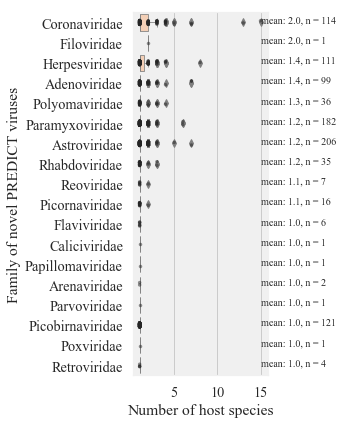

Wall time: 665 ms


In [38]:
%%time
qq = new.groupby('ViralFamily').agg({'hosts_n': ['mean', 'count']})
qq.columns = ['mean', 'count']
qq.sort_values('mean', ascending= False, inplace = True)
order_y = qq.index
f, ax = plt.subplots(figsize = (4,6))
sns.boxplot(data=new, x='hosts_n', y= 'ViralFamily',ax=ax, order = order_y, color="#fdcdac")
sns.stripplot(x='hosts_n', y= 'ViralFamily',
                  data=new,
                  size=3.5,
                  jitter=True,
                  alpha=0.5,
                  color='#252525',order = order_y,
                  ax=ax)
#for i, txt in enumerate(qq['count'].astype(str).values):
#    ax.text(s=txt, x=0.5, y=order_y[i])

qq['String'] = "mean: " +qq['mean'].round(1).astype(str) + ', n = ' +qq['count'].round(1).astype(str)
#df['bar'].astype(str)+'_'+df['foo']+'_'+df['new']
nobs = qq["String"].values
nobs = [i for i in nobs]
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_yticklabels()):
    ax.text(x=15.005, y=pos[tick], s=nobs[tick])
ax.set_xlabel('Number of host species')
ax.set_ylabel('Family of novel PREDICT viruses')
plt.tight_layout()
#f.savefig(output_path + '/human_links.png', dpi=500)
#f.savefig(output_path + '/human_links.svg')
plt.show()

In [19]:
new.ScientificName.head()

0    [Mops condylurus, Chaerephon pumilus]
1                         [Macaca mulatta]
2                         [Macaca mulatta]
3                         [Macaca mulatta]
4                         [Macaca mulatta]
Name: ScientificName, dtype: object

In [21]:
new.iloc[0]

VirusGroup                         Bombali Virus (BOMV)
ViralFamily                                 Filoviridae
VirusStatus                                         new
ScientificName    [Mops condylurus, Chaerephon pumilus]
Order                                      [CHIROPTERA]
PubMed                                                2
Name: 0, dtype: object

In [22]:
new.iloc[0]['ScientificName']

array(['Mops condylurus', 'Chaerephon pumilus'], dtype=object)

In [23]:
new.iloc[0]['ViralFamily']

'Filoviridae'

Mops condylurus
Chaerephon pumilus


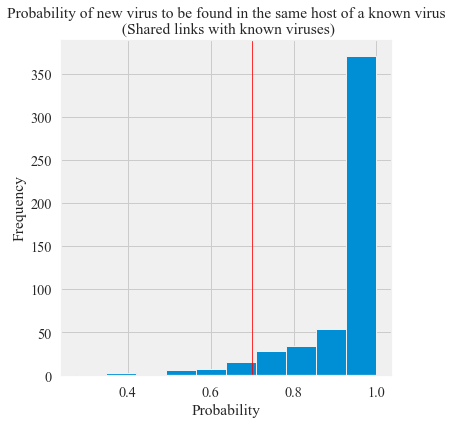

In [24]:
i = 0
a = pred.run_predictions(virus=new.iloc[i]['VirusGroup'],
                         hosts=new.iloc[i]['ScientificName'],
                         PubMed=2,
                         ViralFamily='Filoviridae',
                         BPnx=BPnx,
                         Gc_complete=Gc_complete_Order,
                         virus_df=virus_df,
                         clf_binary=clf_binary,
                         plot=True)

PREDICT_AaV-11
['Macaca mulatta']
1
Adenoviridae


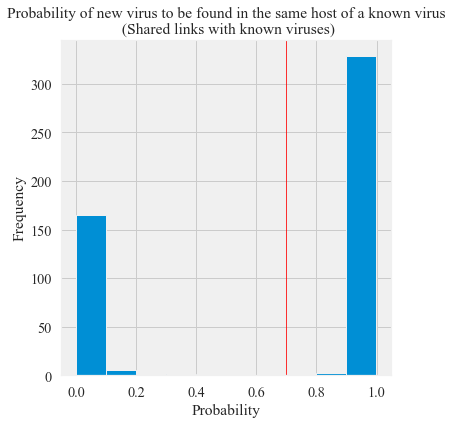

Wall time: 5.14 s


In [25]:
%%time
i = 3
print(new.iloc[i]['VirusGroup'])
print(new.iloc[i]['ScientificName'])
print(new.iloc[i]['PubMed'])
print(new.iloc[i]['ViralFamily'])
a, n_e = pred.run_predictions(virus=new.iloc[i]['VirusGroup'],
                                  hosts=new.iloc[i]['ScientificName'],
                                  PubMed=new.iloc[i]['PubMed'],
                                  ViralFamily=new.iloc[i]['ViralFamily'],
                                  BPnx=BPnx,
                                  Gc_complete=Gc_complete_Order,
                                  virus_df=virus_df,
                                  clf_binary=clf_binary,
                                  plot=True)
if n_e == 0:
    print ('NO PREDICTIONS available for %s as no new connections were made to the known virus network' % (new.iloc[i]['VirusGroup']))

In [26]:
P.iloc[100]['VirusGroup']

'PREDICT_ArenaV-1'

In [27]:
new.iloc[i]['ScientificName']

array(['Macaca mulatta'], dtype=object)

PREDICT_AdV-27
['Macroglossus sobrinus']
1
Adenoviridae


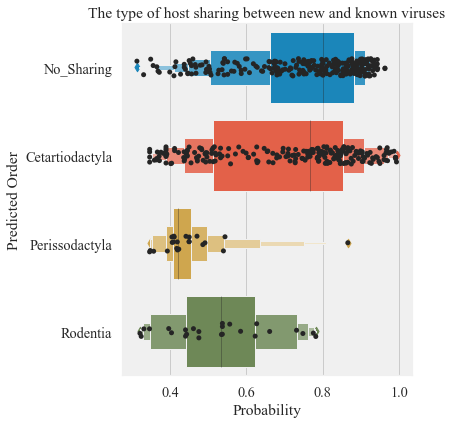

                 mean probability       std  number of links
Link Type                                                   
Cetartiodactyla          0.703039  0.192539              219
No_Sharing               0.749081  0.162369              255
Perissodactyla           0.448601  0.102138               24
Rodentia                 0.523575  0.141045               25
NO PREDICTIONS available for PREDICT_AdV-27 as no new connections were made to the known virus network
Wall time: 7.38 s


In [28]:
%%time

i = 31
print(new.iloc[i]['VirusGroup'])
print(new.iloc[i]['ScientificName'])
print(new.iloc[i]['PubMed'])
print(new.iloc[i]['ViralFamily'])

b, n_e = pred_multi.run_predictions(virus=new.iloc[i]['VirusGroup'],
                                       hosts=new.iloc[i]['ScientificName'],
                                       PubMed=new.iloc[i]['PubMed'],
                                       ViralFamily=new.iloc[i]['ViralFamily'],
                                       BPnx=BPnx,
                                       Gc_complete=Gc_complete_Order,
                                       virus_df=virus_df,
                                       clf_multi=clf_multi,
                                       IUCN = IUCN,
                                       inv_dictionary=inv_dictionary,
                                       plot=True)
if n_e == 0:
    print ('NO PREDICTIONS available for %s as no new connections were made to the known virus network' % (new.iloc[i]['VirusGroup']))

In [29]:
new.shape

(944, 6)

In [30]:
%%time
RESULT_binary = []
RESULT_multi = []
for index, row in new.reset_index().iterrows():
    if index % 50 == 0:
        print ('running predictions for '+ row['VirusGroup']+', virus number '+str(index))
    #for i in range(0, 50):
    binary, n_e = pred.run_predictions(virus=row['VirusGroup'],
                                  hosts=row['ScientificName'],
                                  PubMed=row['PubMed'],
                                  ViralFamily=row['ViralFamily'],
                                  BPnx=BPnx,
                                  Gc_complete=Gc_complete_Order,
                                  virus_df=virus_df,
                                  clf_binary=clf_binary,
                                  plot=False)
    multi, n_e = pred_multi.run_predictions(virus=row['VirusGroup'],
                                       hosts=row['ScientificName'],
                                       PubMed=row['PubMed'],
                                       ViralFamily=row['ViralFamily'],
                                       BPnx=BPnx,
                                       Gc_complete=Gc_complete_Order,
                                       virus_df=virus_df,
                                       clf_multi=clf_multi,
                                       IUCN = IUCN,
                                       inv_dictionary=inv_dictionary,
                                       plot=False)
    if n_e == 0:
        print ('NO PREDICTIONS available for %s as no new connections were made to the known virus network' % (row['VirusGroup']))
    else:
        RESULT_binary.append(binary)
        RESULT_multi.append(multi)

r_binary = pd.concat(RESULT_binary, axis=0)
r_multi = pd.concat(RESULT_multi, axis=0)


r_binary.to_pickle(
    'C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/P1_PREDICTIONS_binary.pkl'
)


r_multi.to_pickle(
    'C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/P1_PREDICTIONS_multi.pkl'
)

running predictions for Bombali Virus (BOMV), virus number 0
Mops condylurus
Chaerephon pumilus
Mops condylurus
Chaerephon pumilus
Sturnira lilium
Sturnirinae
Rhynchonycteris naso
Carollia perspicillata
Artibeus obscurus
Chiroptera
Sturnira sp.
Sturnira lilium
Sturnirinae
Rhynchonycteris naso
Carollia perspicillata
Artibeus obscurus
Chiroptera
Sturnira sp.
Anoura caudifer
Glossophaga soricina
Carollia perspicillata
Anoura caudifer
Glossophaga soricina
Carollia perspicillata
Lophuromys sikapusi
Thryonomys swinderianus
Lophuromys sikapusi
Thryonomys swinderianus
NO PREDICTIONS available for PREDICT_AdV-18 as no new connections were made to the known virus network
NO PREDICTIONS available for PREDICT_AdV-19 as no new connections were made to the known virus network
NO PREDICTIONS available for PREDICT_AdV-2 as no new connections were made to the known virus network
NO PREDICTIONS available for PREDICT_AdV-21 as no new connections were made to the known virus network
Dasymys rufulus
Mus sp

Pteropus giganteus
Chiroptera
Pteropus sp.
Pteropus lylei
Pteropus cf. lylei
Pteropus giganteus
Chiroptera
Pteropus sp.
Pteropus lylei
Pteropus cf. lylei
NO PREDICTIONS available for PREDICT_CoV-18 as no new connections were made to the known virus network
NO PREDICTIONS available for PREDICT_CoV-19 as no new connections were made to the known virus network
NO PREDICTIONS available for PREDICT_CoV-2 as no new connections were made to the known virus network
NO PREDICTIONS available for PREDICT_CoV-20 as no new connections were made to the known virus network
Mops condylurus
Triaenops persicus
Mops condylurus
Triaenops persicus
Hipposideros lekaguli
Macroglossus sp.
Eonycteris spelaea
Rousettus leschenaultii
Hipposideros lekaguli
Macroglossus sp.
Eonycteris spelaea
Rousettus leschenaultii
Rousettus sp.
Eonycteris spelaea
Rousettus sp.
Eonycteris spelaea
Hipposideros lekaguli
Pteropus sp.
Cynopterus sphinx
Cynopterus brachyotis
Cynopterus sp.
Megaerops niphanae
Rousettus sp.
Hipposideros

running predictions for PREDICT_CoV-84, virus number 200
NO PREDICTIONS available for PREDICT_CoV-84 as no new connections were made to the known virus network
NO PREDICTIONS available for PREDICT_CoV-85 as no new connections were made to the known virus network
NO PREDICTIONS available for PREDICT_CoV-86 as no new connections were made to the known virus network
Eonycteris spelaea
Nycteris tragata
Pipistrellus coromandra
Eonycteris spelaea
Nycteris tragata
Pipistrellus coromandra
NO PREDICTIONS available for PREDICT_CoV-88 as no new connections were made to the known virus network
Chaerephon pumilus
Scotophilus cf. heathii
Scotophilus heathii
Chaerephon pumilus
Scotophilus cf. heathii
Scotophilus heathii
NO PREDICTIONS available for PREDICT_CoV-91 as no new connections were made to the known virus network
Rhinolophus lepidus
Hipposideros larvatus species complex
Rhinolophus lepidus
Hipposideros larvatus species complex
NO PREDICTIONS available for PREDICT_CoV-93 as no new connections 

NO PREDICTIONS available for PREDICT_HV-51 as no new connections were made to the known virus network
Nasalis larvatus
Macaca nemestrina
Nasalis larvatus
Macaca nemestrina
NO PREDICTIONS available for PREDICT_HV-53 as no new connections were made to the known virus network
NO PREDICTIONS available for PREDICT_HV-56 as no new connections were made to the known virus network
NO PREDICTIONS available for PREDICT_HV-57 as no new connections were made to the known virus network
NO PREDICTIONS available for PREDICT_HV-58 as no new connections were made to the known virus network
NO PREDICTIONS available for PREDICT_HV-62 as no new connections were made to the known virus network
NO PREDICTIONS available for PREDICT_HV-63 as no new connections were made to the known virus network
NO PREDICTIONS available for PREDICT_HV-64 as no new connections were made to the known virus network
NO PREDICTIONS available for PREDICT_HV-68 as no new connections were made to the known virus network
Sundamys inf

NO PREDICTIONS available for PREDICT_MAstV-157 as no new connections were made to the known virus network
NO PREDICTIONS available for PREDICT_MAstV-158 as no new connections were made to the known virus network
NO PREDICTIONS available for PREDICT_MAstV-159 as no new connections were made to the known virus network
Rousettus sp.
Rousettus leschenaultii
Rousettus sp.
Rousettus leschenaultii
NO PREDICTIONS available for PREDICT_MAstV-160 as no new connections were made to the known virus network
NO PREDICTIONS available for PREDICT_MAstV-161 as no new connections were made to the known virus network
NO PREDICTIONS available for PREDICT_MAstV-162 as no new connections were made to the known virus network
Rhinolophus coelophyllus
Miniopterus magnater
Rhinolophus coelophyllus
Miniopterus magnater
NO PREDICTIONS available for PREDICT_MAstV-163 as no new connections were made to the known virus network
NO PREDICTIONS available for PREDICT_MAstV-164 as no new connections were made to the know

NO PREDICTIONS available for PREDICT_MAstV-74 as no new connections were made to the known virus network
NO PREDICTIONS available for PREDICT_MAstV-75 as no new connections were made to the known virus network
NO PREDICTIONS available for PREDICT_MAstV-76 as no new connections were made to the known virus network
NO PREDICTIONS available for PREDICT_MAstV-79 as no new connections were made to the known virus network
NO PREDICTIONS available for PREDICT_MAstV-80 as no new connections were made to the known virus network
NO PREDICTIONS available for PREDICT_MAstV-81 as no new connections were made to the known virus network
NO PREDICTIONS available for PREDICT_MAstV-82 as no new connections were made to the known virus network
NO PREDICTIONS available for PREDICT_MAstV-84 as no new connections were made to the known virus network
NO PREDICTIONS available for PREDICT_MAstV-85 as no new connections were made to the known virus network
NO PREDICTIONS available for PREDICT_MAstV-86 as no new

NO PREDICTIONS available for PREDICT_PMV-18 as no new connections were made to the known virus network
NO PREDICTIONS available for PREDICT_PMV-180 as no new connections were made to the known virus network
NO PREDICTIONS available for PREDICT_PMV-181 as no new connections were made to the known virus network
running predictions for PREDICT_PMV-182, virus number 650
NO PREDICTIONS available for PREDICT_PMV-182 as no new connections were made to the known virus network
NO PREDICTIONS available for PREDICT_PMV-183 as no new connections were made to the known virus network
NO PREDICTIONS available for PREDICT_PMV-184 as no new connections were made to the known virus network
NO PREDICTIONS available for PREDICT_PMV-185 as no new connections were made to the known virus network
Pteropus giganteus
Pteropus lylei
Pteropus giganteus
Pteropus lylei
Rattus norvegicus
Rattus exulans
Rattus rattus
Rattus sp.
Mus musculus
Suncus murinus
Rattus norvegicus
Rattus exulans
Rattus rattus
Rattus sp.
Mus

Epomops franqueti
Rousettus aegyptiacus
NO PREDICTIONS available for PREDICT_PyV-28 as no new connections were made to the known virus network
NO PREDICTIONS available for PREDICT_PyV-32 as no new connections were made to the known virus network
NO PREDICTIONS available for PREDICT_PyV-33 as no new connections were made to the known virus network
NO PREDICTIONS available for PREDICT_PyV-34 as no new connections were made to the known virus network
running predictions for PREDICT_PyV-37, virus number 900
NO PREDICTIONS available for PREDICT_PyV-37 as no new connections were made to the known virus network
NO PREDICTIONS available for PREDICT_PyV-38 as no new connections were made to the known virus network
NO PREDICTIONS available for PREDICT_PyV-4 as no new connections were made to the known virus network
NO PREDICTIONS available for PREDICT_PyV-5 as no new connections were made to the known virus network
NO PREDICTIONS available for PREDICT_PyV-6 as no new connections were made to the

In [31]:
r_binary.shape

(275223, 12)

In [32]:
r_multi.shape

(275223, 86)

list(nx.common_neighbors(temp_BPnx, 'New_Ebolavirus','Monkeypox virus'))

temp_BPnx.edges('Monkeypox virus')

temp_BPnx.edges('New_Ebolavirus')